<a href="https://colab.research.google.com/github/ttcchub/tensorflow-studies/blob/main/SwapPool_PriceMatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Navigate to the directory where your file is located
# %cd /content/drive/My Drive/YourDirectoryPath

# Read the CSV file using Pandas
import pandas as pd
df = pd.read_csv('LotData.csv')

# Display the DataFrame
df.head()  # Display first few rows of the DataFrame


,LotID,UserID,Product,Category,Quality,Location,Price,Avaliable,Interest_Category,Interest_Price,Interest_Location,Interest_Quality
0,1,1,Nike1,Shoe,100,USA,100,T,Shoe,100,USA,100
1,2,2,Nike2,Shoe,90,CANADA,90,T,Shoe,90,CANADA,90
2,3,3,Nike3,Shoe,90,USA,90,F,Shoe,90,USA,90
3,4,4,Nike4,Shoe,100,CANADA,100,T,Shoe,100,CANADA,100
4,5,5,Nike5,Shoe,100,USA,100,T,Shoe,100,USA,100


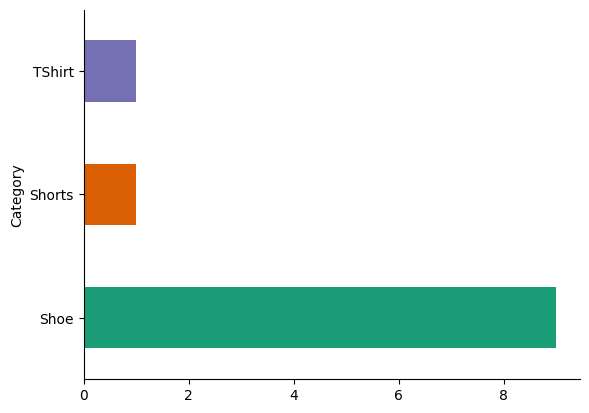

In [9]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# prompt: extract all avaliable "T"

df_f = df[df['Avaliable'] == 'T']
df_f


,LotID,UserID,Product,Category,Quality,Location,Price,Avaliable,Interest_Category,Interest_Price,Interest_Location,Interest_Quality
0,1,1,Nike1,Shoe,100,USA,100,T,Shoe,100,USA,100
1,2,2,Nike2,Shoe,90,CANADA,90,T,Shoe,90,CANADA,90
3,4,4,Nike4,Shoe,100,CANADA,100,T,Shoe,100,CANADA,100
4,5,5,Nike5,Shoe,100,USA,100,T,Shoe,100,USA,100
6,7,7,Nike7,Shoe,80,USA,80,T,Shoe,80,USA,80
8,9,9,Nike9,Shoe,60,USA,60,T,Shoe,60,USA,60
9,10,10,Nike10,TShirt,100,CANADA,100,T,Shoe,100,CANADA,100
10,11,11,Nike11,Shorts,100,USA,95,T,Shoe,95,USA,100


In [11]:
# prompt: sort lotID by max Price , Location , Avaliable

df_f.sort_values(by=['Price', 'Location', 'Avaliable'], ascending=False)


,LotID,UserID,Product,Category,Quality,Location,Price,Avaliable,Interest_Category,Interest_Price,Interest_Location,Interest_Quality
0,1,1,Nike1,Shoe,100,USA,100,T,Shoe,100,USA,100
4,5,5,Nike5,Shoe,100,USA,100,T,Shoe,100,USA,100
3,4,4,Nike4,Shoe,100,CANADA,100,T,Shoe,100,CANADA,100
9,10,10,Nike10,TShirt,100,CANADA,100,T,Shoe,100,CANADA,100
10,11,11,Nike11,Shorts,100,USA,95,T,Shoe,95,USA,100
1,2,2,Nike2,Shoe,90,CANADA,90,T,Shoe,90,CANADA,90
6,7,7,Nike7,Shoe,80,USA,80,T,Shoe,80,USA,80
8,9,9,Nike9,Shoe,60,USA,60,T,Shoe,60,USA,60


MAIN TASK TO TRAIN MODEL ON MATCHING & UN-MATCHING DATA.

BASED ON QUALITY , LOCATION , PRICE , AV

PRICE = or =!

QUALITY = or =!

LOCATION = or =!


In [12]:
# prompt: extract matching LotID by 'Category' , 'Location' , 'Price'

matching_lots = df_f.groupby(['Category', 'Location', 'Price']).apply(lambda x: x['LotID'].tolist())

for key, value in matching_lots.items():
  print(f"Matching LotIDs for {key}: {value}")


Matching LotIDs for ('Shoe', 'CANADA', 90): [2]
Matching LotIDs for ('Shoe', 'CANADA', 100): [4]
Matching LotIDs for ('Shoe', 'USA', 60): [9]
Matching LotIDs for ('Shoe', 'USA', 80): [7]
Matching LotIDs for ('Shoe', 'USA', 100): [1, 5]
Matching LotIDs for ('Shorts', 'USA', 95): [11]
Matching LotIDs for ('TShirt', 'CANADA', 100): [10]


HERE WE CAN SEE THAT LOT 1.0 & 5.0 ARE MAATCHING BY ALL PARAMETERS


In [16]:
# prompt: extract matching LotID by   'Location' , 'Price'

matching_lots_by_location_price = df_f.groupby(['Location', 'Price']).apply(lambda x: x['LotID'].tolist())

for key, value in matching_lots_by_location_price.items():
  print(f"Matching LotIDs for location {key[0]} and price {key[1]}: {value}")


Matching LotIDs for location CANADA and price 90: [2]
Matching LotIDs for location CANADA and price 100: [4, 10]
Matching LotIDs for location USA and price 60: [9]
Matching LotIDs for location USA and price 80: [7]
Matching LotIDs for location USA and price 95: [11]
Matching LotIDs for location USA and price 100: [1, 5]


RE WE CAN SEE THAT LOT **1.0 & 5.0 & 10.0 ** ARE MATCHING BY Location & Price


In [15]:
# prompt: extract matching LotID by   'Location'

matching_lots_by_location_price = df_f.groupby(['Location']).apply(lambda x: x['LotID'].tolist())

for key, value in matching_lots_by_location_price.items():
  print(f"Matching LotIDs for location {key[0]}: {value}")


Matching LotIDs for location C: [2, 4, 10]
Matching LotIDs for location U: [1, 5, 7, 9, 11]


In [17]:
# prompt: extract matching LotID by price difference in 10%

def extract_matching_lots_by_price_difference(df_f, price_difference_percentage):
  matching_lots = {}
  for key, group in df_f.groupby(['Category', 'Location']):
    lots_by_price = group.groupby('Price')['LotID'].apply(list).to_dict()
    for price, lot_ids in lots_by_price.items():
      for other_price in lots_by_price.keys():
        if price == other_price:
          continue
        price_diff = abs(price - other_price)
        if price_diff / price <= price_difference_percentage:
          matching_lots.setdefault((key, price), []).extend(lot_ids)
          matching_lots.setdefault((key, other_price), []).extend(lot_ids)
  return matching_lots

matching_lots = extract_matching_lots_by_price_difference(df_f, 0.1)

for key, value in matching_lots.items():
  print(f"Matching LotIDs for {key}: {value}")


Matching LotIDs for (('Shoe', 'CANADA'), 100): [4]
Matching LotIDs for (('Shoe', 'CANADA'), 90): [4]


In [18]:
# Function definitions
def calculate_percentage_difference(a, b):
    numerator = abs(a - b)
    denominator = (a + b) / 2
    percentage_difference = 100 * numerator / denominator
    return percentage_difference

def calculate_difference(a, b):
    diff = abs(a - b)
    return diff

# Parameters
max_price = df_f['Price'].max()

# Calculate and display differences with 'Price'
for index, row in df_f.iterrows():
    if row['Price'] != max_price:
        percentage_diff = calculate_percentage_difference(max_price, row['Price'])
        diff = calculate_difference(max_price, row['Price'])
        print(f"The percentage difference between 'Price'={row['Price']} and max 'Price'={max_price} is {percentage_diff}%")
        print(f"The difference between 'Price'={row['Price']} and max 'Price'={max_price} is {diff}")
        print()


The percentage difference between 'Price'=90 and max 'Price'=100 is 10.526315789473685%
The difference between 'Price'=90 and max 'Price'=100 is 10

The percentage difference between 'Price'=80 and max 'Price'=100 is 22.22222222222222%
The difference between 'Price'=80 and max 'Price'=100 is 20

The percentage difference between 'Price'=60 and max 'Price'=100 is 50.0%
The difference between 'Price'=60 and max 'Price'=100 is 40

The percentage difference between 'Price'=95 and max 'Price'=100 is 5.128205128205129%
The difference between 'Price'=95 and max 'Price'=100 is 5



We need to compare all lotID between each other.

we should find lowest difference between next parameters :

'Category' and 'Interest_Category'
'Price' and 'Interest_Price'
'Quality' and 'Interest_Quality'
'Location' and 'Interest_Location'

In [31]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('LotData.csv')

# Initialize dictionary to store Price differences for each LotID 1
price_differences = {}

# Initialize dictionary to store Price percentage differences for each LotID 2
price_percentage_differences = {}

# Iterate through each LotID
for i in range(len(df)):
    lot_id = df.loc[i, 'LotID']
    price = df.loc[i, 'Price']

    # Initialize list to store Price differences for current LotID 1
    price_differences[lot_id] = []
    # Initialize list to store Price percentage differences for current LotID 2
    price_percentage_differences[lot_id] = []

    # Compare Price with all other LotIDs1
    for j in range(len(df)):
        if j != i:  # Skip comparison with itself
            other_price = df.loc[j, 'Price']
            difference = abs(price - other_price)
            price_differences[lot_id].append((df.loc[j, 'LotID'], difference))

   # Compare Price with all other LotIDs 2
    for j in range(len(df)):
        if j != i:  # Skip comparison with itself
            other_price = df.loc[j, 'Price']
            percentage_difference = abs((price - other_price) / price) * 100
            price_percentage_differences[lot_id].append((df.loc[j, 'LotID'], percentage_difference))


# Print Price differences for each LotID
for lot_id, differences in price_differences.items():
    print(f"LotID {lot_id}:")
    for other_lot_id, difference in differences:
        print(f"   Price difference with LotID {other_lot_id}: {difference}")

# Print Price percentage differences for each LotID
for lot_id, differences in price_percentage_differences.items():
    print(f"LotID {lot_id}:")
    for other_lot_id, percentage_difference in differences:
        print(f"   Price percentage difference with LotID {other_lot_id}: {percentage_difference:.2f}%")



LotID 1:
   Price difference with LotID 2: 10
   Price difference with LotID 3: 10
   Price difference with LotID 4: 0
   Price difference with LotID 5: 0
   Price difference with LotID 6: 0
   Price difference with LotID 7: 20
   Price difference with LotID 8: 30
   Price difference with LotID 9: 40
   Price difference with LotID 10: 0
   Price difference with LotID 11: 5
LotID 2:
   Price difference with LotID 1: 10
   Price difference with LotID 3: 0
   Price difference with LotID 4: 10
   Price difference with LotID 5: 10
   Price difference with LotID 6: 10
   Price difference with LotID 7: 10
   Price difference with LotID 8: 20
   Price difference with LotID 9: 30
   Price difference with LotID 10: 10
   Price difference with LotID 11: 5
LotID 3:
   Price difference with LotID 1: 10
   Price difference with LotID 2: 0
   Price difference with LotID 4: 10
   Price difference with LotID 5: 10
   Price difference with LotID 6: 10
   Price difference with LotID 7: 10
   Price differ

Since we set match stages as



1.   Category  = 20%
2.   Price  = 20%
3.   Quality  =  20%
4.   Location  =  20%
5.    Picture Match = 20%


20% * 5 = 100% Match parameter

We should check all parameters separately , save statistic and after collect all data we recived collect in one story and based on rule of 50% provide a best suggestion / match candidat


In [35]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('LotData.csv')

# Initialize dictionary to store Quality differences for each LotID
quality_differences = {}

# Iterate through each LotID
for i in range(len(df)):
    lot_id = df.loc[i, 'LotID']
    quality = df.loc[i, 'Quality']

    # Initialize list to store Quality differences for current LotID
    quality_differences[lot_id] = []

    # Compare Quality with all other LotIDs
    for j in range(len(df)):
        if j != i:  # Skip comparison with itself
            other_lot_id = df.loc[j, 'LotID']
            other_quality = df.loc[j, 'Quality']
            difference = abs(quality - other_quality)
            quality_differences[lot_id].append((other_lot_id, difference))

# Print and record Quality differences for each LotID
output_statistics = []

for lot_id, differences in quality_differences.items():
    for other_lot_id, difference in differences:
        print(f"LotID {lot_id} vs. LotID {other_lot_id}: Quality difference = {difference}")
        output_statistics.append({'LotID1': lot_id, 'LotID2': other_lot_id, 'QualityDifference': difference})

# Convert output statistics to DataFrame for further analysis
output_df = pd.DataFrame(output_statistics)




LotID 1 vs. LotID 2: Quality difference = 10
LotID 1 vs. LotID 3: Quality difference = 10
LotID 1 vs. LotID 4: Quality difference = 0
LotID 1 vs. LotID 5: Quality difference = 0
LotID 1 vs. LotID 6: Quality difference = 0
LotID 1 vs. LotID 7: Quality difference = 20
LotID 1 vs. LotID 8: Quality difference = 30
LotID 1 vs. LotID 9: Quality difference = 40
LotID 1 vs. LotID 10: Quality difference = 0
LotID 1 vs. LotID 11: Quality difference = 0
LotID 2 vs. LotID 1: Quality difference = 10
LotID 2 vs. LotID 3: Quality difference = 0
LotID 2 vs. LotID 4: Quality difference = 10
LotID 2 vs. LotID 5: Quality difference = 10
LotID 2 vs. LotID 6: Quality difference = 10
LotID 2 vs. LotID 7: Quality difference = 10
LotID 2 vs. LotID 8: Quality difference = 20
LotID 2 vs. LotID 9: Quality difference = 30
LotID 2 vs. LotID 10: Quality difference = 10
LotID 2 vs. LotID 11: Quality difference = 10
LotID 3 vs. LotID 1: Quality difference = 10
LotID 3 vs. LotID 2: Quality difference = 0
LotID 3 vs. L